In [3]:
%matplotlib inline
import cv2
import numpy as np
import os
from copy import deepcopy

import sys
sys.path.append('../')

#from utils import set_save_files, save_dir, ensure_dir, get_save_files
import matplotlib
from matplotlib.pyplot import imshow, figure, plot, clf

perspective_correction = None
perspective_correction_inv = None
perspective_trapezoid = None
warp_size = None
orig_size = None
left_fit_avg = None
right_fit_avg = None
MIN_DETECTIONS = 8
MAX_DETECTIONS = 10


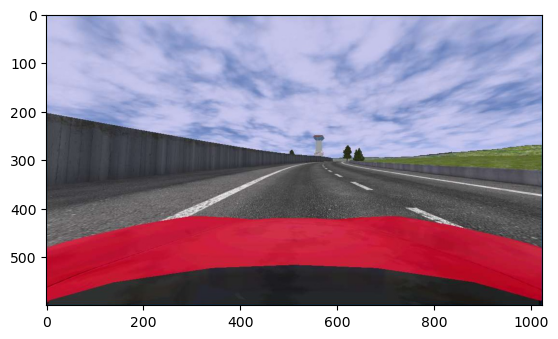

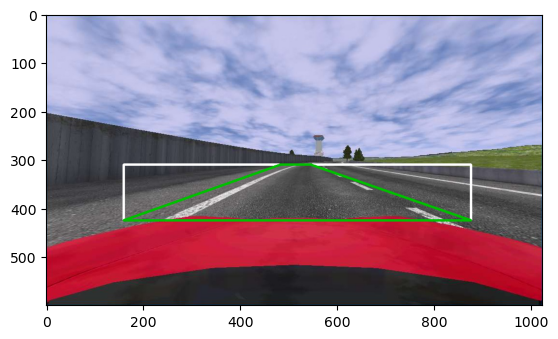

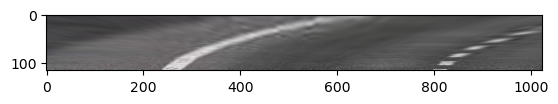

In [5]:
def compute_perspective(width, height, pt1, pt2, pt3, pt4):
    global perspective_trapezoid, perspective_dest
    
    perspective_trapezoid = [(pt1[0], pt1[1]), (pt2[0], pt2[1]), (pt3[0], pt3[1]), (pt4[0], pt4[1])]
    src = np.float32([pt1, pt2, pt3, pt4])
    x1 = pt1[0]
    x2 = pt4[0]
    y1 = pt1[1]
    y2 = pt2[1]
    h = y1 - y2
    dst = np.float32([[x1, h], [x1, 0], [x2, 0], [x2, h]])
    perspective_dest = [(x1, y1), (x1, y2), (x2, y2), (x2, y1)]
    
    global perspective_correction, perspective_correction_inv
    global warp_size, orig_size
    
    perspective_correction = cv2.getPerspectiveTransform(src, dst)
    perspective_correction_inv = cv2.getPerspectiveTransform(dst, src)
    warp_size = (width, h)
    orig_size = (width, height)
    
def warp(img, filename):
    img_persp = img.copy()
    
    cv2.line(img_persp, perspective_dest[0], perspective_dest[1], (255, 255, 255), 3)
    cv2.line(img_persp, perspective_dest[1], perspective_dest[2], (255, 255, 255), 3)
    cv2.line(img_persp, perspective_dest[2], perspective_dest[3], (255, 255, 255), 3)
    cv2.line(img_persp, perspective_dest[3], perspective_dest[0], (255, 255, 255), 3)

    cv2.line(img_persp, perspective_trapezoid[0], perspective_trapezoid[1], (0, 192, 0), 3)
    cv2.line(img_persp, perspective_trapezoid[1], perspective_trapezoid[2], (0, 192, 0), 3)
    cv2.line(img_persp, perspective_trapezoid[2], perspective_trapezoid[3], (0, 192, 0), 3)
    cv2.line(img_persp, perspective_trapezoid[3], perspective_trapezoid[0], (0, 192, 0), 3)
    
    return img_persp, cv2.warpPerspective(img, perspective_correction, warp_size, flags=cv2.INTER_LANCZOS4)

compute_perspective(1024, 600, [160, 425], [484, 310], [546, 310], [877, 425])
filename = "sd2.jpg"
img_bgr = cv2.imread(filename)
imshow(cv2.cvtColor(img_bgr, cv2.COLOR_RGB2BGR))
figure()
img_persp, img_warped = warp(img_bgr, filename)
imshow(cv2.cvtColor(img_persp, cv2.COLOR_RGB2BGR))
figure()
imshow(cv2.cvtColor(img_warped, cv2.COLOR_RGB2BGR))